In [5]:
!pip install 'plotnine[all]'

  Using cached plotnine-0.13.6-py3-none-any.whl.metadata (8.9 kB)
  Using cached mizani-0.11.4-py3-none-any.whl.metadata (4.8 kB)
  Using cached build-1.2.2.post1-py3-none-any.whl.metadata (6.5 kB)
  Using cached twine-5.1.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached pre_commit-4.0.1-py2.py3-none-any.whl.metadata (1.3 kB)
  Using cached jupyter-1.1.1-py2.py3-none-any.whl.metadata (2.0 kB)
  Using cached nbsphinx-0.9.5-py3-none-any.whl.metadata (2.1 kB)
  Using cached numpydoc-1.8.0-py3-none-any.whl.metadata (4.3 kB)
  Using cached quartodoc-0.8.1-py3-none-any.whl.metadata (7.2 kB)
  Using cached adjustText-1.2.0-py3-none-any.whl.metadata (3.0 kB)
  Using cached scikit_misc-0.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (5.0 kB)
  Using cached ruff-0.6.9-py3-none-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (25 kB)
  Using cached pytest_cov-5.0.0-py3-none-any.whl.metadata (27 kB)
  Using cached tabulate-0.9.0-py3-none-any.whl.metadata (34 kB)

# How we can describe and summarise (numeric) data statistically? (in 10 min)

- Central tendency measures (and scales/levels of measurement): mean, median, mode
- Spread measures (standard deviation, percentiles & percentile ranges) <- not today, but important
- Key abstractions of stats: probability distribution and data generation process <- if have time


In [6]:
import pandas as pd

data = {
    'role': ['Technical', 'Technical', 'Technical', 'Technical', 'Technical', 
             'Technical', 'Technical', 'Technical', 'Technical', 'Technical', 
             'Creative', 'Creative', 'Creative', 'Creative', 'Creative', 
             'Creative', 'Creative', 'Creative', 'Creative', 'Creative'],
    'salary': [75, 78, 75, 80, 75, 80, 75, 85, 75, 70,
               55, 60, 55, 45, 50, 55, 100, 60, 45, 55]
}

df = pd.DataFrame(data)
df


,role,salary
0,Technical,75
1,Technical,78
2,Technical,75
3,Technical,80
4,Technical,75
5,Technical,80
6,Technical,75
7,Technical,85
8,Technical,75
9,Technical,70


In [7]:
print(data['salary'])

[75, 78, 75, 80, 75, 80, 75, 85, 75, 70, 55, 60, 55, 45, 50, 55, 100, 60, 45, 55]


In [ ]:
df.salary.describe()

In [8]:
from plotnine import ggplot, aes, geom_boxplot, geom_point, geom_hline, geom_vline, geom_histogram, labs, theme, facet_wrap
# Calculate statistics
overall_mean = df['salary'].mean()
overall_median = df['salary'].median()
overall_mode = df['salary'].mode()[0]

# For each role
technical_mean = df[df['role'] == 'Technical']['salary'].mean()
technical_median = df[df['role'] == 'Technical']['salary'].median()
technical_mode = df[df['role'] == 'Technical']['salary'].mode()[0]

creative_mean = df[df['role'] == 'Creative']['salary'].mean()
creative_median = df[df['role'] == 'Creative']['salary'].median()
creative_mode = df[df['role'] == 'Creative']['salary'].mode()[0]

# Central tendency measures: mean, median, mode

We can represent a lot of different types of data with numbers:

- Some are *numeric* (think age, salary, number of cookies)
- Some are *ordinal* but not really numeric, even if we can represent them with numbers (mild-medium-spicy, height order without actual height measurement, levels of education). Key heuristic: "distance" between values is not equal/undefined
- Some are *nominal/categorical*: color of eyes or cars, marital status, nationality. Key heuristic: can't rank them

Can go down, can't go up!


# (Arithmetic) mean, (arithmetic) Average

- The simplest way we all know: sum up and divide by the number of elements
- Works for **numeric** data (only*)


In [9]:
print(data['salary'])
sum(data['salary'])/len(data['salary'])

[75, 78, 75, 80, 75, 80, 75, 85, 75, 70, 55, 60, 55, 45, 50, 55, 100, 60, 45, 55]


67.4

In [10]:
overall_mean_plot = (ggplot(df, aes(x='salary'))
    + geom_histogram(binwidth=2, fill="lightblue", color="black", alpha=0.7)
    + geom_vline(aes(xintercept=overall_mean), linetype="dashed", color="red", size=1)
    + labs(title="Overall Salary Histogram with Mean", x="Salary (in Thousands)", y="Frequency")
    + theme(legend_position="right")
)


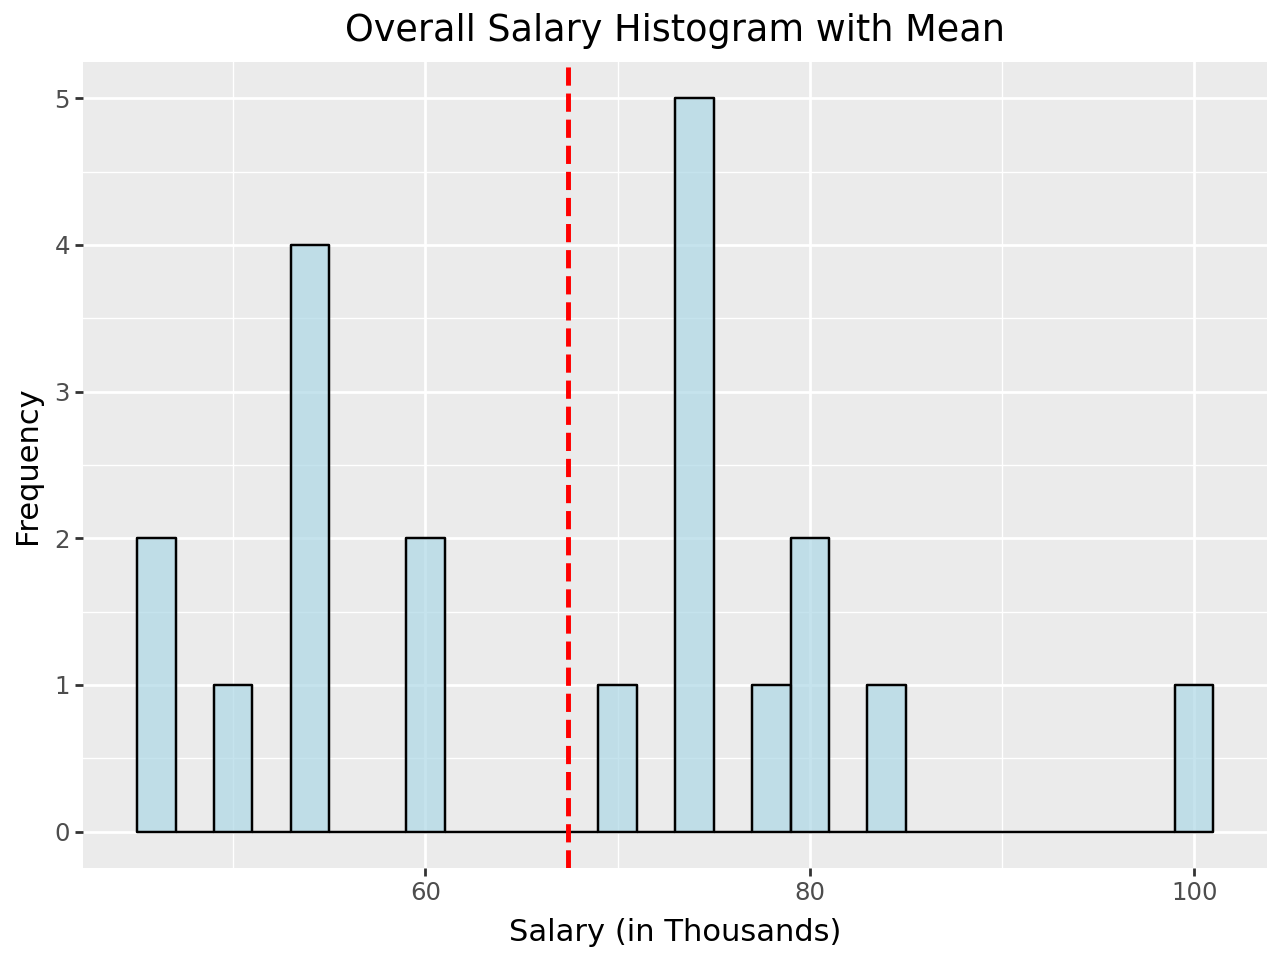

In [11]:
overall_mean_plot.show()

What we can say about how well the mean summarizes our data?

# Median: *positional* average

- Sort our data
- Choose the value in the center
- Can calculate for *numeric* and *ordinal* data (actually we are transforming numeric to ordinal)


In [12]:
sorted_salary = sorted(data['salary'])
print(sorted_salary)
print(len(sorted_salary))

[45, 45, 50, 55, 55, 55, 55, 60, 60, 70, 75, 75, 75, 75, 75, 78, 80, 80, 85, 100]
20


- We have even number of elements, so median is an average of two central

In [13]:
print(sorted_salary)
middle1 = len(sorted_salary)//2
print(middle1)

middle2 = len(sorted_salary)//2-1
print(middle2)

[45, 45, 50, 55, 55, 55, 55, 60, 60, 70, 75, 75, 75, 75, 75, 78, 80, 80, 85, 100]
10
9


In [14]:
(sorted_salary[middle1] + sorted_salary[middle2])/2

72.5

In [16]:
from statistics import median
median(data['salary'])

72.5

In [18]:
overall_mean_median_plot = (ggplot(df, aes(x='salary'))
    + geom_histogram(binwidth=2, fill="lightblue", color="black", alpha=0.7)
    + geom_vline(aes(xintercept=overall_mean), linetype="dashed", color="red", size=1)
    + geom_vline(aes(xintercept=overall_median), linetype="dotted", color="green", size=1)
    + labs(title="Overall Salary Histogram with Mean and Median", x="Salary (in Thousands)", y="Frequency")
    + theme(legend_position="none")
)

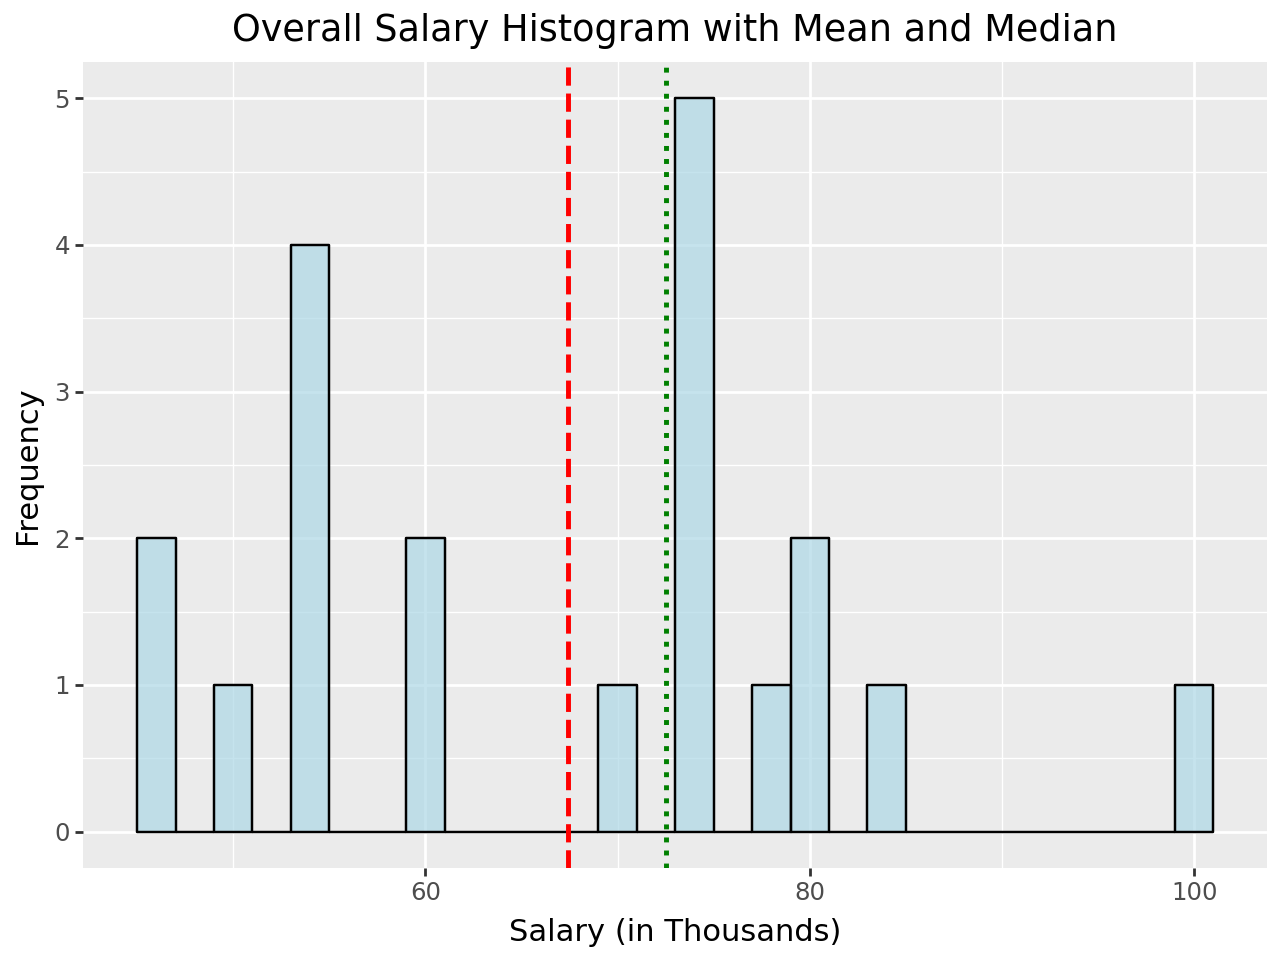

In [19]:
overall_mean_median_plot.show()

## Why median and what are the caveats

- Our median salary is higher than the mean — what does it mean?
- In the example `[10, 15, 20, 100]`, would the mean or median be higher? 
- Which one is more "fair" to report as an average salary?
- Median is less sensitive to outliers, but that comes at a cost (less sensitivity means we drop some information)


## Some examples when we (ideally) should only use median
- Skewed data: Household Income or Wealth, Daily Commute Times, Hospital Wait Times 
- Ordinal data: Customer Satisfaction Ratings, Educational Attainment, Likert (Agree-Disagree) scales


## Median and quantiles (percentiles or quartiles)

- Stats people love numbers!
- You (hopefully) love/know (some) Latin
- If we sort our data, we can split it into parts: **quantiles**
    - four parts (**quartiles**) 
    - 100 parts (if data is large enough) (**percentiles**)
- Median is the **50th percentile** and the **2nd quartile**


In [23]:
from numpy import quantile
print(sorted(data['salary']))
print(quantile(data['salary'], 0.5)) #50 percentile 2nd quartile median 50% of people have salariies less or equal than this
print(quantile(data['salary'], 0.1)) #10 percentile (10% of people have salaries less or equal than this)
print(quantile(data['salary'], 0.75)) #75 percentile 3rd quartile

[45, 45, 50, 55, 55, 55, 55, 60, 60, 70, 75, 75, 75, 75, 75, 78, 80, 80, 85, 100]
72.5
49.5
75.75


# Mode: most frequent value(-s)

- Count how often each value appears in our data
- Choose the maximum


In [24]:
frequency = {}

for value in data['salary']:
    if value in frequency:
        frequency[value] += 1
    else:
        frequency[value] = 1

print(frequency)

{75: 5, 78: 1, 80: 2, 85: 1, 70: 1, 55: 4, 60: 2, 45: 2, 50: 1, 100: 1}


In [25]:
# Plot overall histogram with mean, median, and mode
overall_mode_plot = (ggplot(df, aes(x='salary'))
    + geom_histogram(binwidth=2, fill="lightblue", color="black", alpha=0.7)
    + geom_vline(aes(xintercept=overall_mean), linetype="dashed", color="red", size=1)
    + geom_vline(aes(xintercept=overall_median), linetype="dotted", color="green", size=1)
    + geom_vline(aes(xintercept=overall_mode), linetype="solid", color="blue", size=1)
    + labs(title="Overall Salary Histogram with Mean, Median, and Mode", x="Salary (in Thousands)", y="Frequency")
    + theme(legend_position="none")
)

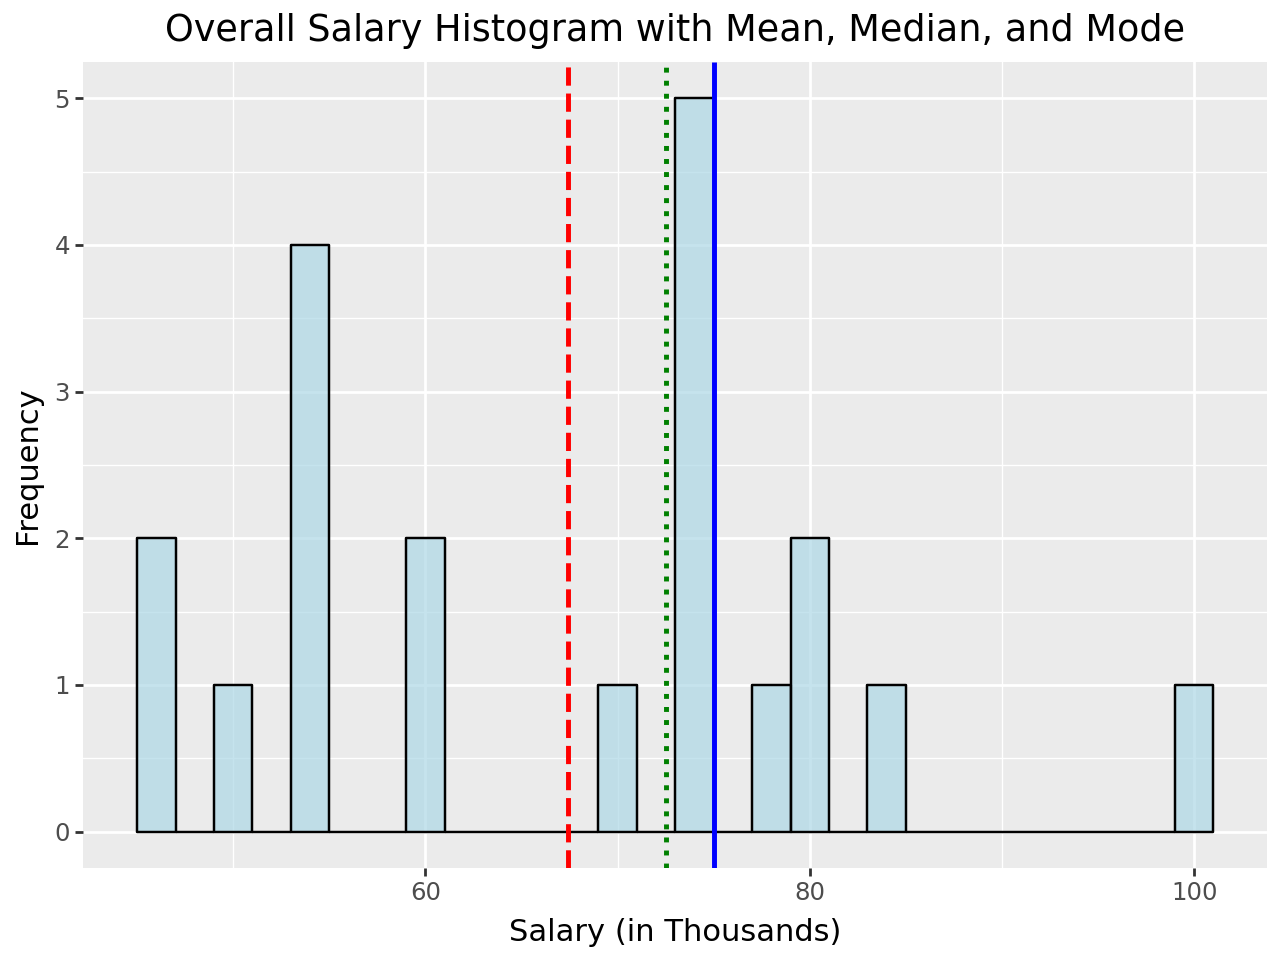

In [26]:
overall_mode_plot.show()

## Some examples when we should use *mode*
- **Only mode**: *Most Common...*: Language Spoken, Purchased Product, Public Transport Preferred
- When we suspect bimodality in ordinal data (satisfaction surveys), the median might trick us


## That's probably where we wrap up today

We can represent a lot of different types of data with numbers:

- Some are *numeric* (think age, salary, number of cookies) -- **use mean (or median for skewed data)**
- Some are *ordinal* but not really numeric, even if we can represent them with numbers (mild-medium-spicy, height order without actual height measurement, levels of education). Key heuristic: "distance" between values is not equal/undefined -- **use median**
- Some are *nominal/categorical*: color of eyes or cars, marital status, nationality. Key heuristic: can't rank them -- **use mode**

Can go down, can't go up!

Always remember that there are caveats, really think **what** are you looking for!


## Take home "Talk with yourself" questions

- What can we seeon our graph here? Practice describing.  
- What are the "typical" values?  
- What is the order of the mean and median and what does it represent?

## Bonus content for the most curious: Let's get back to our graph

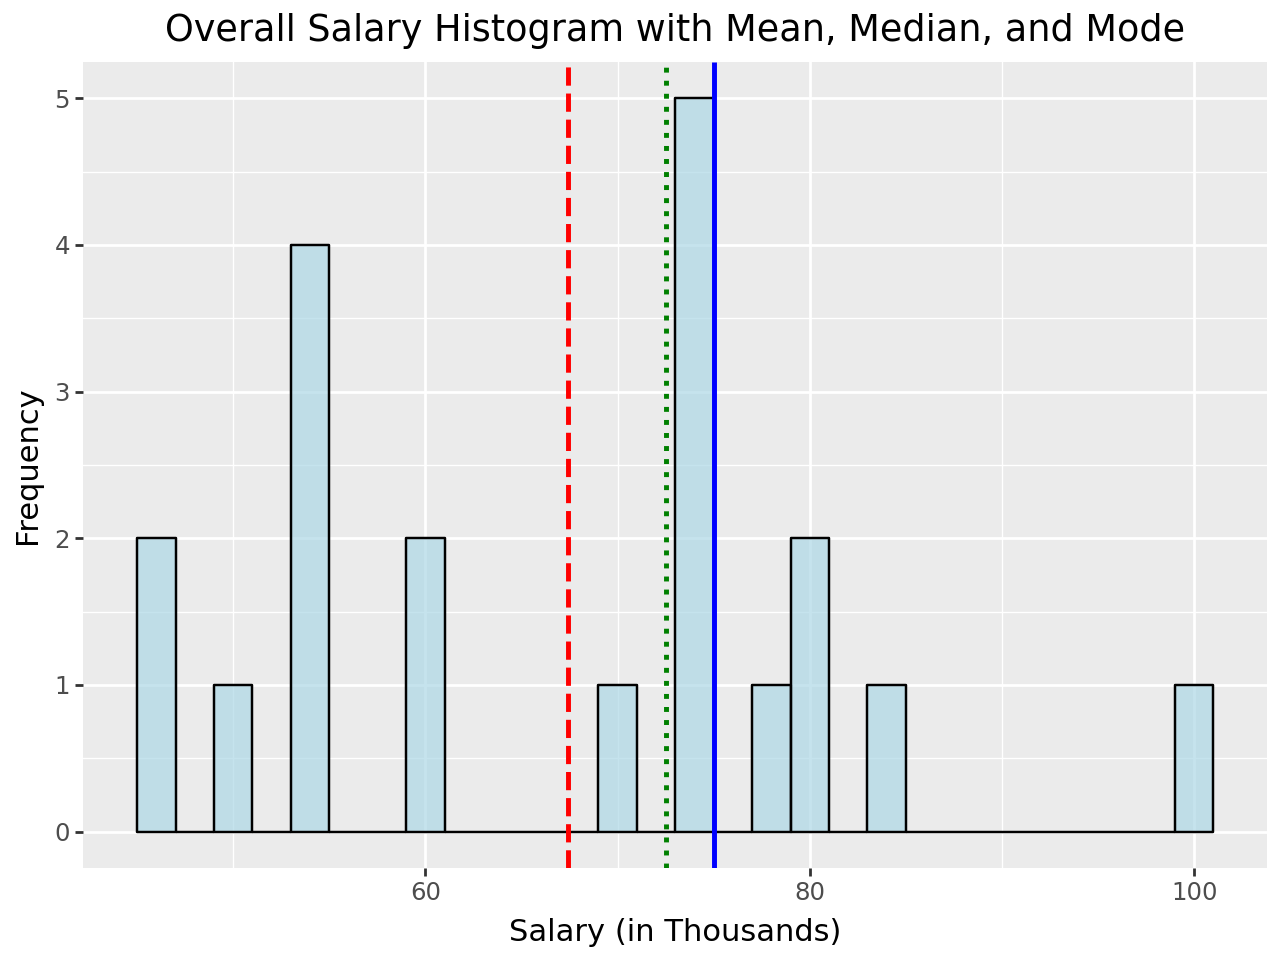

In [122]:
overall_mode_plot.show()

- Technically, we have only one mode (75)
- But our data is small, and 55 is suspiciously frequent
- Sometimes that means we are dealing with a bimodal distribution (there is an underlying factor influencing the values)

## Key statistics abstractions:
- Probability distributions (think "shape of data"): 
    - central tendency, typical spread, range, skewness
- Data generation process (DGP) (think: "model of the world"):
    - how we summarize what happens in the real world to produce the data
    - can have many or few details; sometimes we ignore almost everything but assume the DGP is the same for our data
    - domain specialist (yours!) responsibility, not a statistical artifact

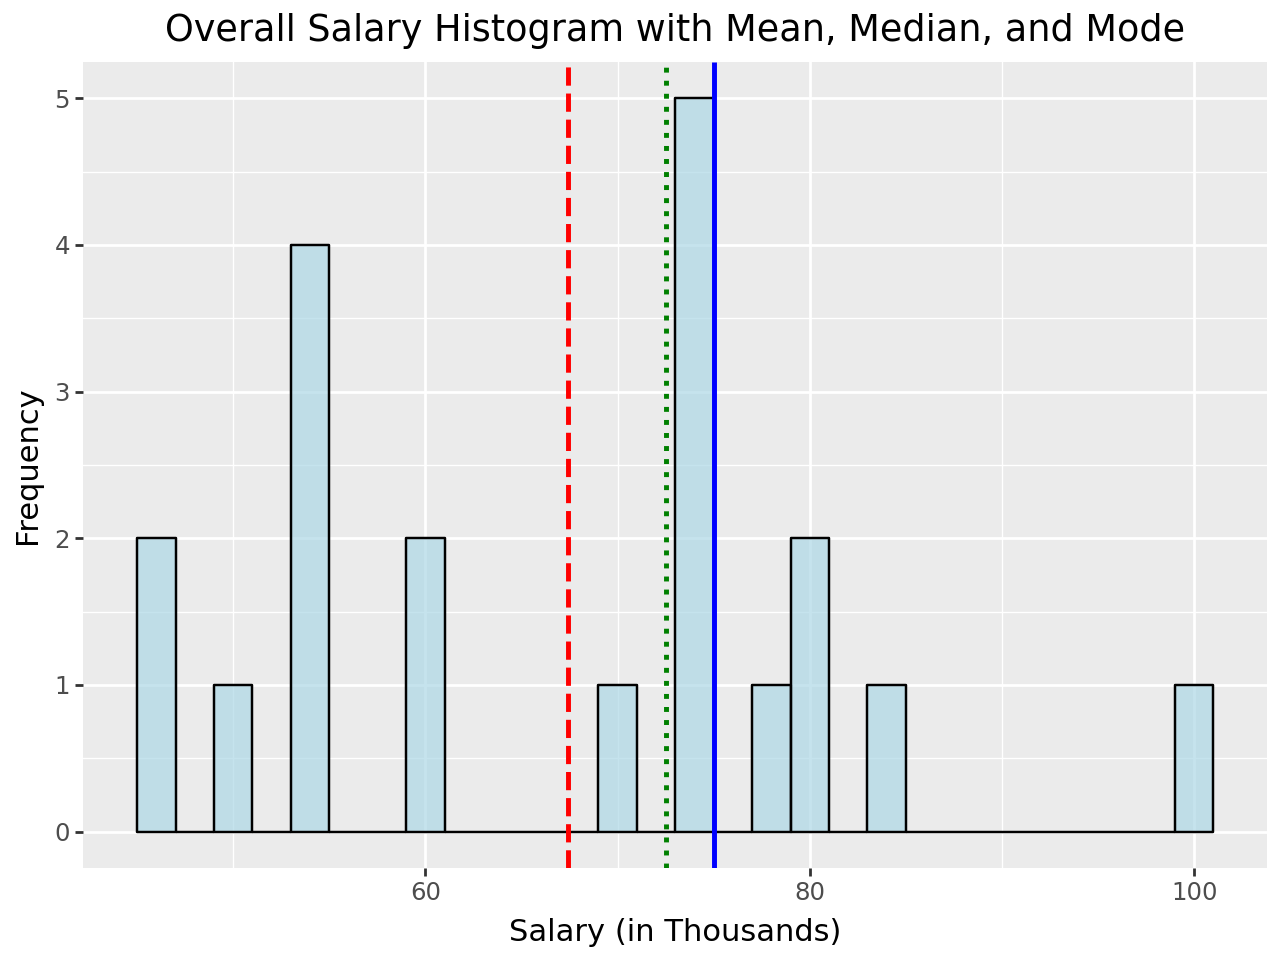

In [124]:
overall_mode_plot.show()

## Back to our data

- Actually, it reflects two types of salaries: for 'creative' and 'technical' writing jobs
- No way to know that from data (bimodality is just a weak cue, you need to understand your field, have a theory)
- If you have a **hypothesis** (or **-es**), data can help to tell you which one is more probable


In [ ]:
from plotnine import ggplot, aes, geom_histogram, geom_vline, labs, theme, facet_wrap

# Plot split by role with mean only for each role (conditionally)
split_mean_plot = (ggplot(df, aes(x='salary', fill='role'))
    + geom_histogram(binwidth=2, color="black", alpha=0.7)
    + geom_vline(aes(xintercept=technical_mean), linetype="dashed", color="red", size=1, data=df[df['role'] == 'Technical'])
    + geom_vline(aes(xintercept=creative_mean), linetype="dashed", color="red", size=1, data=df[df['role'] == 'Creative'])
    + labs(title="Salary Histograms by Role with Mean", x="Salary (in Thousands)", y="Frequency")
    + facet_wrap('~role')
    + theme(legend_position="none")
)


In [ ]:
# Plot split by role with mean, median, and mode for each role (conditionally)
split_complete_plot = (ggplot(df, aes(x='salary', fill='role'))
    + geom_histogram(binwidth=2, color="black", alpha=0.7)
    + geom_vline(aes(xintercept=technical_mean), linetype="dashed", color="red", size=1, data=df[df['role'] == 'Technical'])
    + geom_vline(aes(xintercept=technical_median), linetype="dotted", color="green", size=1, data=df[df['role'] == 'Technical'])
    + geom_vline(aes(xintercept=technical_mode), linetype="solid", color="blue", size=1, data=df[df['role'] == 'Technical'])
    + geom_vline(aes(xintercept=creative_mean), linetype="dashed", color="red", size=1, data=df[df['role'] == 'Creative'])
    + geom_vline(aes(xintercept=creative_median), linetype="dotted", color="green", size=1, data=df[df['role'] == 'Creative'])
    + geom_vline(aes(xintercept=creative_mode), linetype="solid", color="blue", size=1, data=df[df['role'] == 'Creative'])
    + labs(title="Salary Histograms by Role with Mean, Median, and Mode", x="Salary (in Thousands)", y="Frequency")
    + facet_wrap('~role')
    + theme(legend_position="none")
)


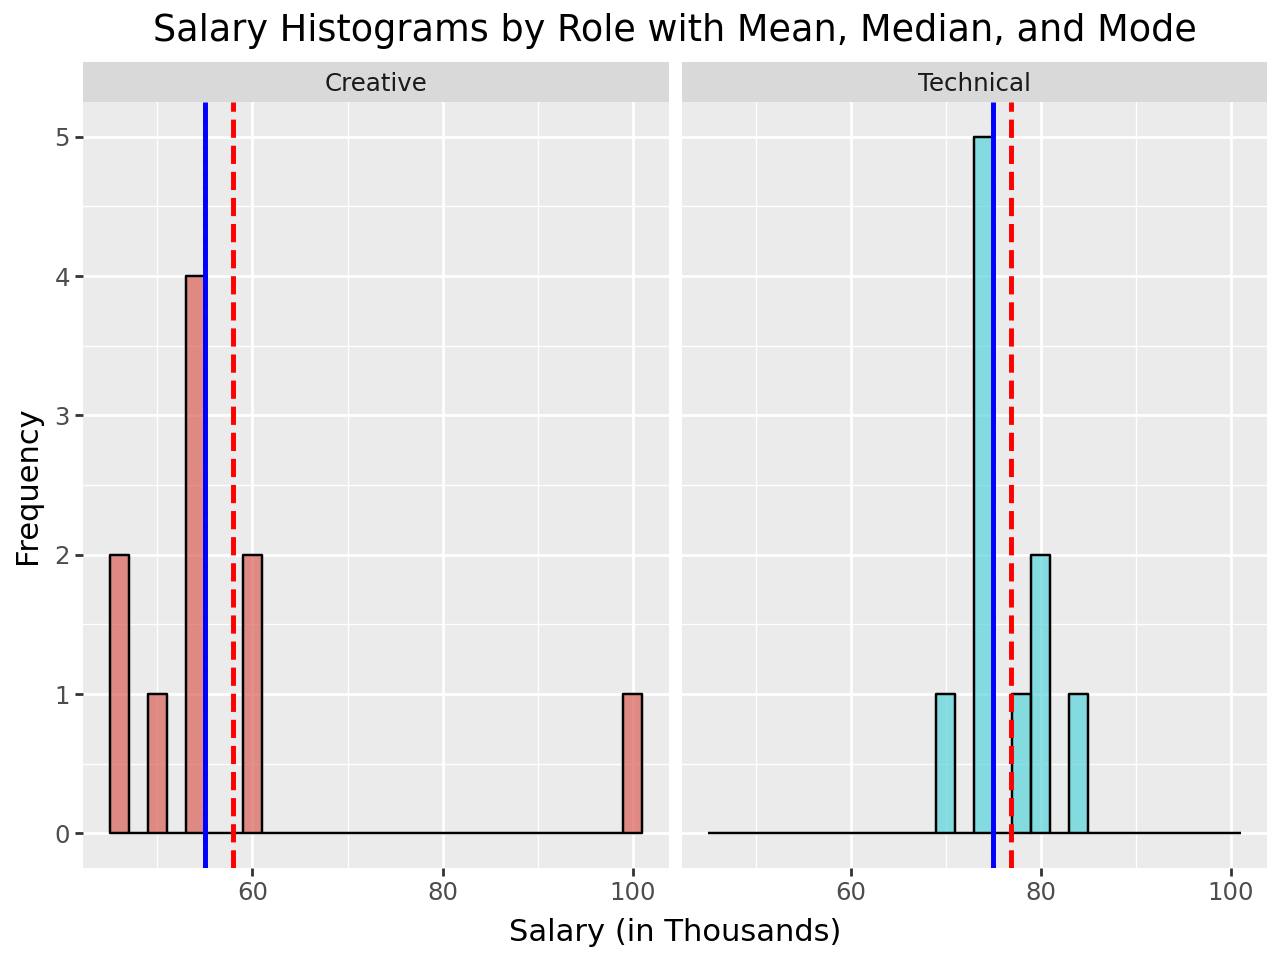

In [123]:
split_complete_plot.show()

## Take home "Talk with yourself" questions

- What can we see here? Practice describing.  
- What are the typical values?  
- Did the order of the mean and median change?  
- Are both distributions unimodal?